<a href="https://colab.research.google.com/github/samehaisaa/Shape-Recognition-And-Descriptor-Analysis/blob/main/pca_color_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(423, 627, 3)


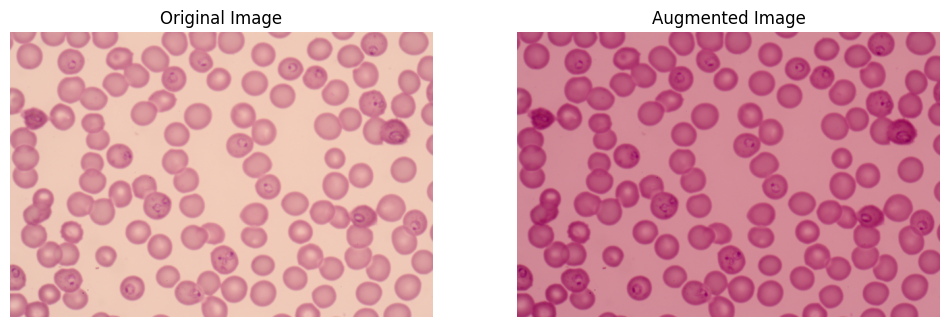

In [28]:
import numpy as np
import cv2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def pca_color_augmentation(image, alpha=0.1):
    """
    Apply PCA-based color augmentation to an RGB image.

    Parameters:
    - image: Input image as a NumPy array of shape (H, W, 3).
    - alpha: Magnitude of random perturbation along principal directions.

    Returns:
    - Augmented image as a NumPy array of the same shape as input.
    """
    img_reshaped = image.reshape(-1, 3)

    pca = PCA(n_components=1)
    pca.fit(img_reshaped)

    eigenvectors = pca.components_
    eigenvalues = pca.explained_variance_

    random_shift = np.random.normal(scale=alpha, size=1) * np.sqrt(eigenvalues)
    shift_vector = eigenvectors.T @ random_shift
    img_augmented = img_reshaped + shift_vector
    img_augmented = np.clip(img_augmented, 0, 255)
    return img_augmented.reshape(image.shape).astype(np.uint8)

image = cv2.imread('/content/figIMAGEORIGINALE.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

augmented_image = pca_color_augmentation(image, alpha=1.5)
print(augmented_image.shape)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title('Augmented Image')
plt.axis('off')

plt.show()


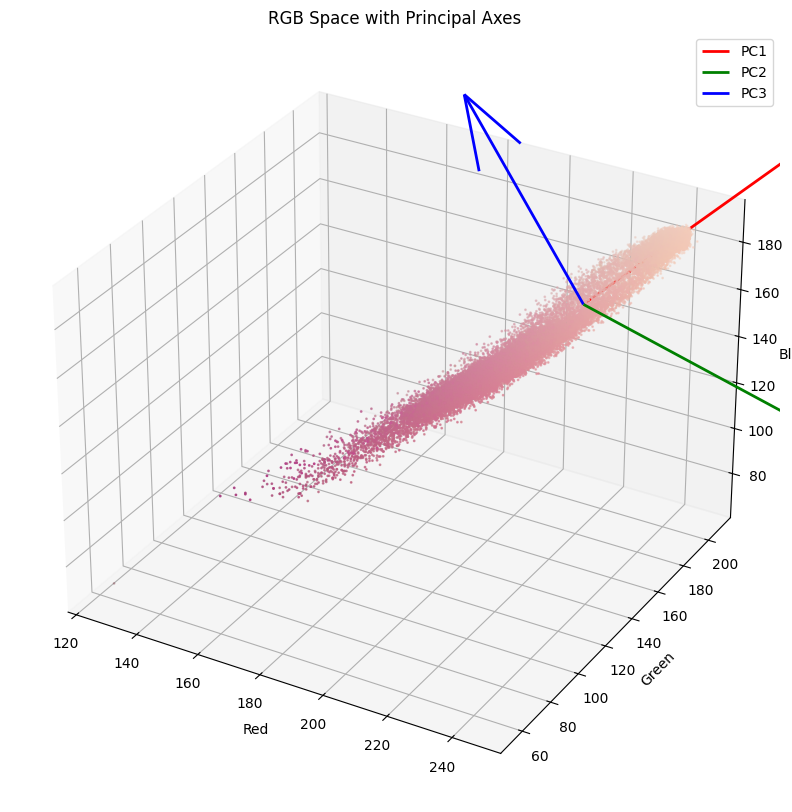

In [ ]:
import numpy as np
import cv2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_rgb_and_principal_axes(image_path, num_points=5000):
    """
    Visualize the RGB space of an image and its principal axes.

    Parameters:
    - image_path: Path to the input image.
    - num_points: Number of randomly sampled pixels for visualization.
    """
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    pixels = image.reshape(-1, 3)

    if len(pixels) > num_points:
        sampled_indices = np.random.choice(len(pixels), num_points, replace=False)
        pixels = pixels[sampled_indices]

    pca = PCA(n_components=3)
    pca.fit(pixels)

    eigenvectors = pca.components_
    mean = pca.mean_  # Shape (3,)

    variances = pca.explained_variance_

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(pixels[:, 0], pixels[:, 1], pixels[:, 2], c=pixels / 255.0, s=1)
    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    ax.set_title('RGB Space with Principal Axes')

    for i in range(3):
        start = mean
        end = mean + eigenvectors[i] * np.sqrt(variances[i]) * 50
        ax.quiver(
            start[0], start[1], start[2],
            end[0] - start[0], end[1] - start[1], end[2] - start[2],
            color=['red', 'green', 'blue'][i], linewidth=2, label=f'PC{i+1}'
        )

    ax.legend()
    plt.show()

# Example usage
visualize_rgb_and_principal_axes('/content/figIMAGEORIGINALE.png', num_points=50000)


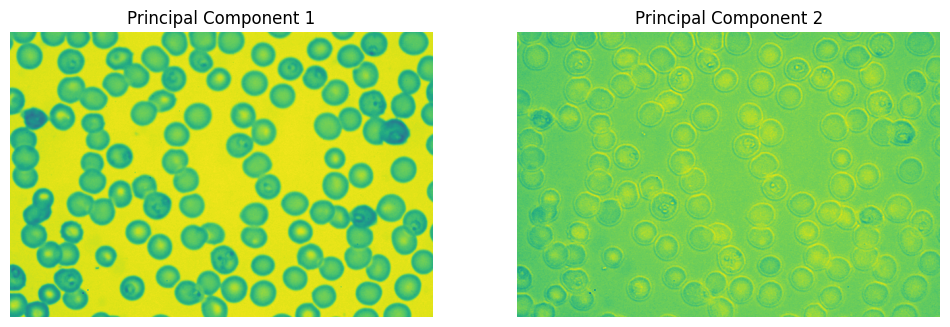

Explained variance ratio: [0.99360817 0.0035964  0.00279544]


In [ ]:
import numpy as np
import cv2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def pca_reduce_to_2(image_path):
    """
    Perform PCA to reduce RGB channels of an image from 3D to 2D.

    Parameters:
    - image_path: Path to the input image.

    Returns:
    - Reduced image in 2D (H, W, 2).
    """
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, channels = image.shape

    pixels = image.reshape(-1, 3)

    pca = PCA(n_components=3)
    reduced_pixels = pca.fit_transform(pixels)

    reduced_image = reduced_pixels.reshape(height, width, 3)

    return reduced_image, pca

def visualize_reduced_image(reduced_image):
    """
    Visualize the reduced 2D representation of an image using PCA.

    Parameters:
    - reduced_image: Image in 2D (H, W, 2).
    """
    min_val = np.min(reduced_image)
    max_val = np.max(reduced_image)
    reduced_normalized = reduced_image

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(reduced_normalized[:, :, 0] + reduced_normalized[:, :, 1]+ reduced_normalized[:, :, 2] )
    plt.title('Principal Component 1')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reduced_normalized[:, :, 1], )
    plt.title('Principal Component 2')
    plt.axis('off')

    plt.show()

image_path = '/content/figIMAGEORIGINALE.png'
reduced_image, pca = pca_reduce_to_2(image_path)
visualize_reduced_image(reduced_image)

print("Explained variance ratio:", pca.explained_variance_ratio_)
